In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

from sklearn import preprocessing
from scipy import stats
from scipy.stats import norm, skew

In [2]:
data = pd.read_csv('AmesHousing.csv')    # Reading the File

In [3]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Renaming all the columns because the names contains blank spaces
data.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [5]:
data.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# Dropping PID and Order columns because they are of no use
data.drop(['PID', 'Order'], axis=1, inplace=True)

Skewness of SalePrice:  1.74350007574


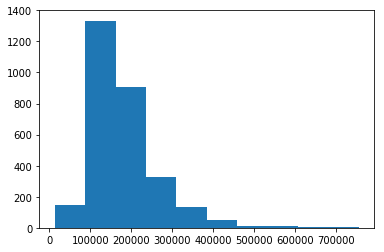

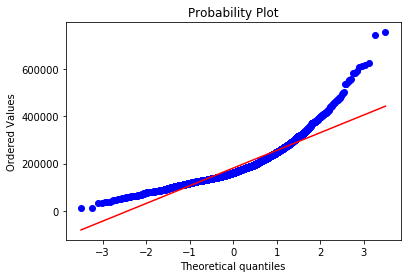

In [7]:
# Calculating and plotting the skewness of SalePrice

print("Skewness of SalePrice: ", data.SalePrice.skew())
plt.hist(data.SalePrice)
plt.show()

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

Skewness of SalePrice:  -0.0147726595372


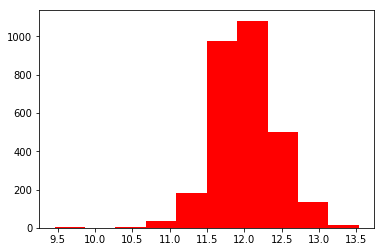

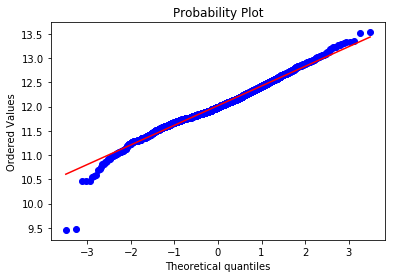

In [8]:
# Taking log of SalePrice to remove the skewness and plotting it

data['SalePrice_Skew'] = np.log(data['SalePrice']+1)
print("Skewness of SalePrice: ", data['SalePrice_Skew'].skew())
plt.hist(data['SalePrice_Skew'], color='red')
plt.show()

fig = plt.figure()
res = stats.probplot(data['SalePrice_Skew'], plot=plt)
plt.show()

In [9]:
# Calculating the correlation between each feature and SalePrice
corr = data.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:])

SalePrice          1.000000
SalePrice_Skew     0.946304
Overall_Qual       0.799262
Gr_Liv_Area        0.706780
Garage_Cars        0.647877
Garage_Area        0.640401
Total_Bsmt_SF      0.632280
1st_Flr_SF         0.621676
Year_Built         0.558426
Full_Bath          0.545604
Year_Remod/Add     0.532974
Garage_Yr_Blt      0.526965
Mas_Vnr_Area       0.508285
TotRms_AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin_SF_1       0.432914
Lot_Frontage       0.357318
Wood_Deck_SF       0.327143
Open_Porch_SF      0.312951
Half_Bath          0.285056
Bsmt_Full_Bath     0.276050
2nd_Flr_SF         0.269373
Lot_Area           0.266549
Bsmt_Unf_SF        0.182855
Bedroom_AbvGr      0.143913
Screen_Porch       0.112151
Pool_Area          0.068403
Mo_Sold            0.035259
3Ssn_Porch         0.032225
BsmtFin_SF_2       0.005891
Misc_Val          -0.015691
Yr_Sold           -0.030569
Bsmt_Half_Bath    -0.035835
Low_Qual_Fin_SF   -0.037660
MS_SubClass       -0.085092
Overall_Cond      -0

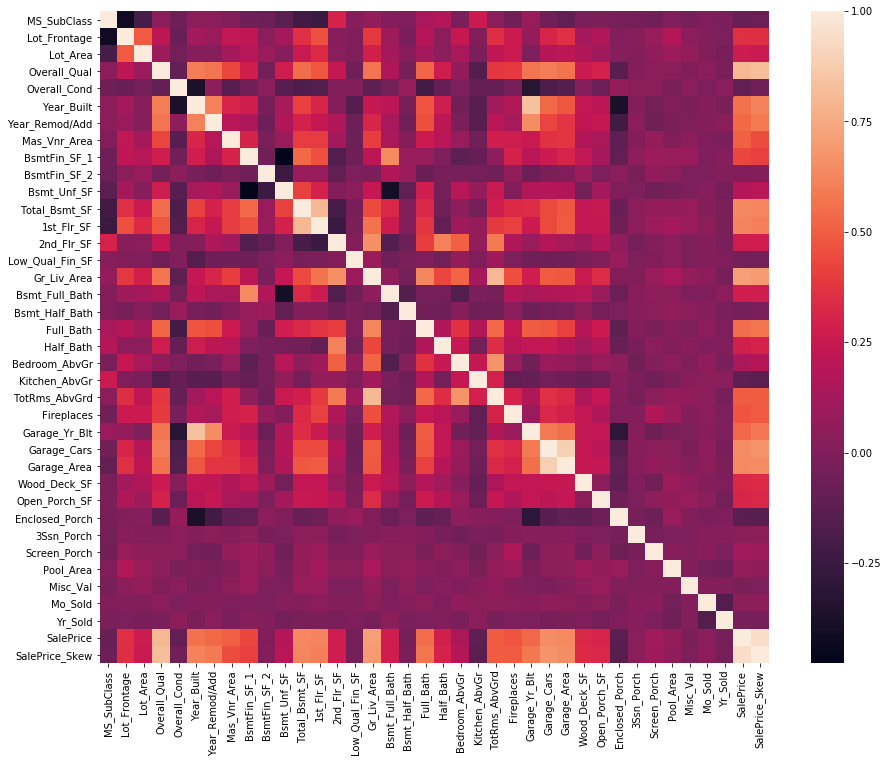

In [10]:
# Plotting the correlation heat map
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr)
plt.show()

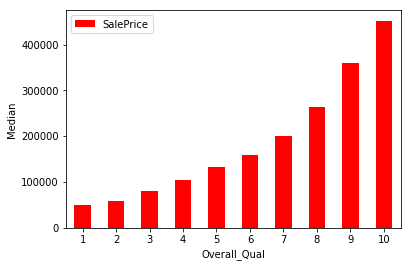

In [11]:
# Analyzing the Overall Quality feature with respect to SalePrice
data.Overall_Qual.unique()
pivot = data.pivot_table(index='Overall_Qual', values='SalePrice', aggfunc=np.median)

pivot.plot(kind='bar', color='red')
plt.xlabel('Overall_Qual')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

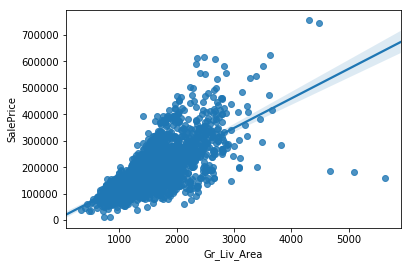

In [12]:
# Analyzing the Gr_Liv_Area feature with respect to SalePrice
sns.regplot(x='Gr_Liv_Area', y='SalePrice', data=data)

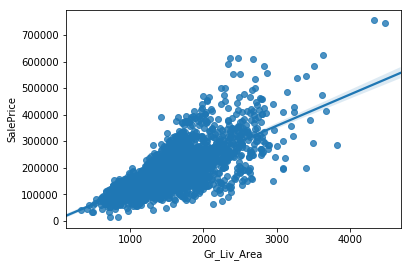

In [13]:
# Removing the outliers
data = data.drop(data[(data['Gr_Liv_Area']>4000) & (data['SalePrice']<300000)].index)
sns.regplot(x='Gr_Liv_Area', y='SalePrice', data=data)

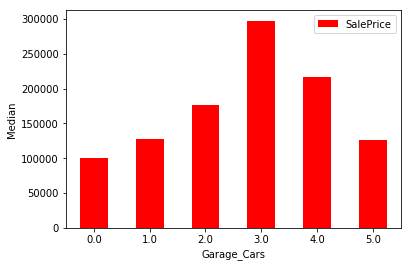

In [14]:
# Analyzing the Garage_Cars feature with respect to SalePrice
data.Garage_Cars.unique()
pivot2 = data.pivot_table(index='Garage_Cars', values='SalePrice', aggfunc=np.median)

pivot2.plot(kind='bar', color='red')
plt.xlabel('Garage_Cars')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

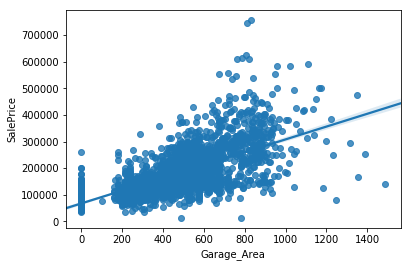

In [15]:
# Analyzing the Garage_Area feature with respect to SalePrice
sns.regplot(x='Garage_Area', y='SalePrice', data=data)

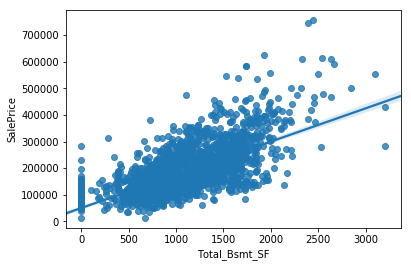

In [16]:
# Analyzing the Total_Bsmt_SF feature with respect to SalePrice
sns.regplot(x='Total_Bsmt_SF', y='SalePrice', data=data)

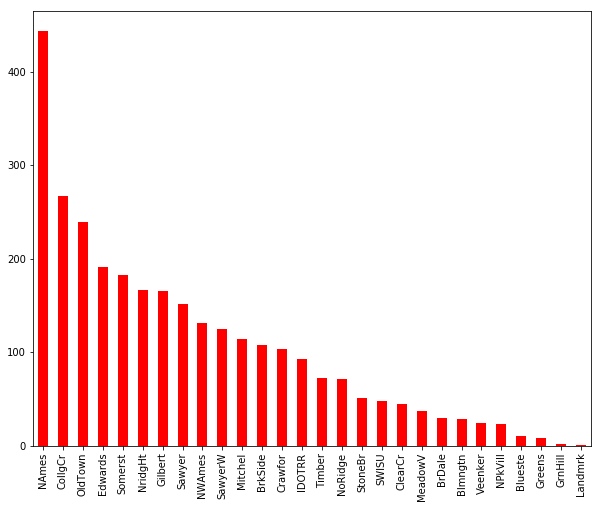

In [17]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
data['Neighborhood'].value_counts().plot(kind='bar', color='red')

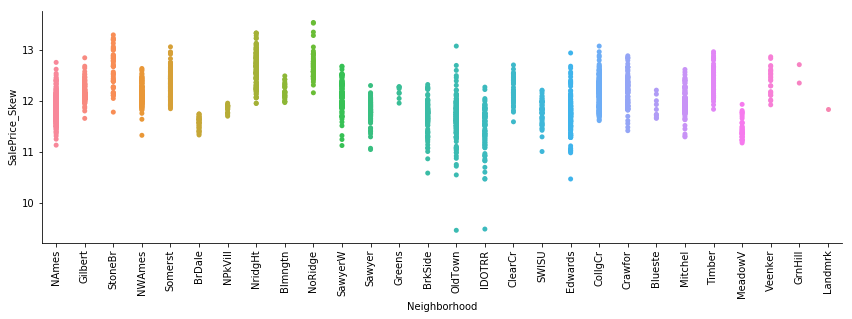

In [18]:
# Plotting the Neighborhood houses with respect to the skewed Sales Price
g = sns.factorplot(x='Neighborhood', y='SalePrice_Skew', data=data, kind='strip', aspect=3, )
g.set_xticklabels(rotation=90)

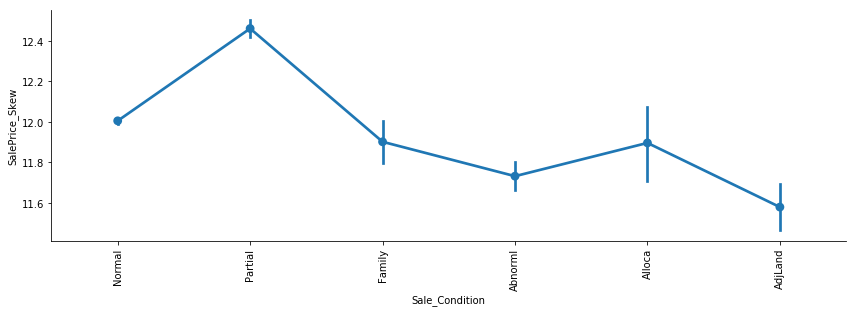

In [19]:
# Plotting the Sale Condition of houses with respect to Skewed Sales Price
g = sns.factorplot(x='Sale_Condition', y='SalePrice_Skew', data=data, kind='point', aspect=3, )
g.set_xticklabels(rotation=90)

In [20]:
# Finding all the missing values in the dataset and then calculating the missing ratio of each feature
all_data = (data.isnull().sum() / len(data)) * 100
all_data = all_data.drop(all_data[all_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data})
missing_data.head(10)

,Missing Ratio
Pool_QC,99.590024
Misc_Feature,96.412709
Alley,93.235395
Fence,80.457807
Fireplace_Qu,48.582166
Lot_Frontage,16.740690
Garage_Yr_Blt,5.432183
Garage_Cond,5.432183
Garage_Qual,5.432183
Garage_Finish,5.432183


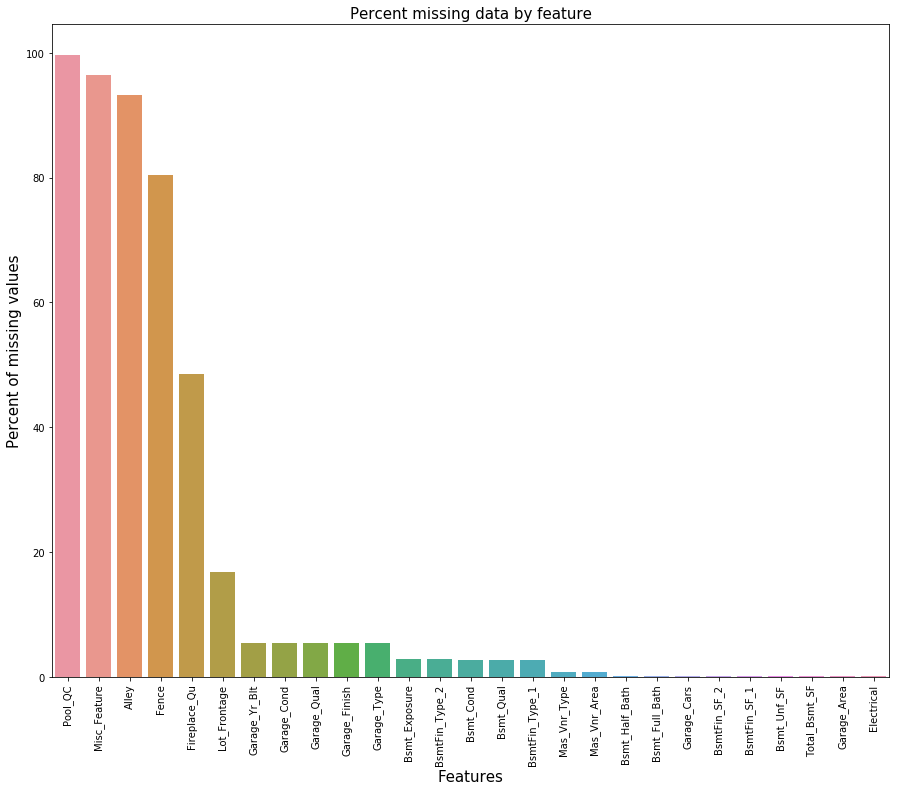

In [21]:
# Plotting the missing ratio of data by feature
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=all_data.index, y=all_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation='90')
plt.show()

In [22]:
# Now we will deal with all the missing data in the dataset

In [23]:
data["Pool_QC"] = data["Pool_QC"].fillna("None")

In [24]:
data["Misc_Feature"] = data["Misc_Feature"].fillna("None")

In [25]:
data["Alley"] = data["Alley"].fillna("None")

In [26]:
data["Fence"] = data["Fence"].fillna("None")

In [27]:
data["Fireplace_Qu"] = data["Fireplace_Qu"].fillna("None")

In [28]:
data["Lot_Frontage"] = data["Lot_Frontage"].fillna(data["Lot_Frontage"].median())

In [29]:
for col in ('Garage_Type', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond'):
    data[col] = data[col].fillna('None')

In [30]:
for col in ('Garage_Yr_Blt', 'Garage_Area', 'Garage_Cars'):
    data[col] = data[col].fillna(0)

In [31]:
for col in ('BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF','Total_Bsmt_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath'):
    data[col] = data[col].fillna(0)

In [32]:
for col in ('Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2'):
    data[col] = data[col].fillna('None')

In [33]:
data["Mas_Vnr_Type"] = data["Mas_Vnr_Type"].fillna("None")
data["Mas_Vnr_Area"] = data["Mas_Vnr_Area"].fillna(0)

In [34]:
data['MS_Zoning'] = data['MS_Zoning'].fillna(data['MS_Zoning'].mode()[0])

In [35]:
data = data.drop(['Utilities'], axis=1)

In [36]:
data["Functional"] = data["Functional"].fillna("Typ")

In [37]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [38]:
data['Kitchen_Qual'] = data['Kitchen_Qual'].fillna(data['Kitchen_Qual'].mode()[0])

In [39]:
data['Exterior_1st'] = data['Exterior_1st'].fillna(data['Exterior_1st'].mode()[0])
data['Exterior_2nd'] = data['Exterior_2nd'].fillna(data['Exterior_2nd'].mode()[0])

In [40]:
data['Sale_Type'] = data['Sale_Type'].fillna(data['Sale_Type'].mode()[0])

In [41]:
data['MS_SubClass'] = data['MS_SubClass'].fillna("None")

In [42]:
# Calculating the missing ratio again to check if any missing data has been left out
all_data = (data.isnull().sum() / len(data)) * 100
all_data = all_data.drop(all_data[all_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data})
missing_data.head(20)

,Missing Ratio


In [43]:
# Converting some features to string because they are categorical data
data['MS_SubClass'] = data['MS_SubClass'].apply(str)
data['Overall_Cond'] = data['Overall_Cond'].astype(str)
data['Yr_Sold'] = data['Yr_Sold'].astype(str)
data['Mo_Sold'] = data['Mo_Sold'].astype(str)

In [44]:
# Adding a new feature, i.e. Total Surface Area
data['Total_SF'] = data['Total_Bsmt_SF'] + data['1st_Flr_SF'] + data['2nd_Flr_SF']

In [45]:
final = data['SalePrice']
final_skew = data['SalePrice_Skew']

data.drop(['SalePrice', 'SalePrice_Skew'], axis=1, inplace=True)

In [46]:
# Calculating the skewness of all the features (Some features are highly skewed)
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Misc_Val,22.221198
Pool_Area,17.719247
Lot_Area,13.178732
Low_Qual_Fin_SF,12.105635
3Ssn_Porch,11.391990
Kitchen_AbvGr,4.309065
BsmtFin_SF_2,4.136226
Enclosed_Porch,4.010074
Screen_Porch,3.953057
Bsmt_Half_Bath,3.952498


In [47]:
# Applying Box Cox Transformation to deal with the skewness of all the features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
l = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], l)

There are 33 skewed numerical features


In [48]:
data = pd.get_dummies(data)
print(data.shape)

(2927, 352)


In [49]:
# Splitting the data into training and test data
X_train = data[100:]
X_test = data[:100]

In [50]:
X_train.head()

,Lot_Frontage,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
100,5.914940,14.361317,2.259674,14.182841,14.182841,8.274266,9.577769,0.0,9.577769,11.354094,...,0,0,0,1,0,0,0,0,1,0
101,5.914940,15.467493,2.259674,14.182841,14.182841,12.545548,10.094578,0.0,8.946561,11.354094,...,0,0,0,1,0,0,0,0,1,0
102,4.137711,14.984171,2.440268,14.181278,14.181278,0.000000,10.758304,0.0,6.491070,11.132254,...,0,0,0,1,0,0,0,0,1,0
103,5.914940,14.764653,2.440268,14.187527,14.187527,0.000000,8.548743,0.0,8.914179,10.420613,...,0,0,0,1,0,0,0,0,1,0
104,5.591427,20.892399,2.602594,14.198437,14.198437,0.000000,12.214281,0.0,10.784117,13.575378,...,1,0,0,0,0,0,0,0,0,1


In [51]:
X_test.head()

,Lot_Frontage,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,7.353462,24.898884,2.259674,14.119786,14.119786,6.881187,10.905922,0.000000,9.956819,12.343354,...,0,0,0,1,0,0,0,0,1,0
1,6.221214,20.479373,2.055642,14.121376,14.121376,0.000000,10.105326,7.397498,8.780689,11.775114,...,0,0,0,1,0,0,0,0,1,0
2,6.244956,21.327220,2.259674,14.116605,14.116605,6.808145,11.901094,0.000000,9.752379,12.943735,...,0,0,0,1,0,0,0,0,1,0
3,6.512196,20.314716,2.440268,14.132484,14.132484,0.000000,12.303551,0.000000,12.249734,14.350878,...,0,0,0,1,0,0,0,0,1,0
4,6.073289,21.196905,2.055642,14.178149,14.179714,0.000000,11.476685,0.000000,7.293500,11.916131,...,0,0,0,1,0,0,0,0,1,0


In [52]:
y_train = final_skew[100:]
y_test = final_skew[:100]

In [53]:
y_train.head()

100    12.086732
101    12.083911
102    11.951187
103    11.898943
104    12.498433
Name: SalePrice_Skew, dtype: float64

In [54]:
y_test.head()

0    12.278398
1    11.561725
2    12.055256
3    12.404928
4    12.154258
Name: SalePrice_Skew, dtype: float64

In [55]:
# Importing the Machine Learning Models
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
# Defining a regressor. Just comment 1 of them to see the results of the other regressor. The default regressor is Gradient Boosting Regressor

rgr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
'''
rgr = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)
'''

'\nrgr = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, \n                             learning_rate=0.05, max_depth=3, \n                             min_child_weight=1.7817, n_estimators=2200,\n                             reg_alpha=0.4640, reg_lambda=0.8571,\n                             subsample=0.5213, silent=1, nthread = -1)\n'

In [57]:
# Fitting the model
rgr = rgr.fit(X_train, y_train)

In [58]:
# Predicting the sale prices
pred = rgr.predict(X_test)

In [59]:
pred

array([ 12.14555992,  11.73633665,  12.01905332,  12.41806176,
        12.14316978,  12.21489098,  12.19888432,  12.09748626,
        12.4376791 ,  12.16416573,  12.06879017,  12.05784806,
        11.98318682,  12.14737011,  12.31575508,  13.17225486,
        12.24376079,  12.81475091,  11.60991373,  12.22435397,
        12.22570051,  12.13807207,  12.28714502,  11.94058534,
        11.94050326,  11.79988139,  11.73785027,  11.54659834,
        12.14945724,  11.47212867,  11.53931883,  11.48885595,
        11.87061746,  11.90793681,  11.64865581,  11.85961878,
        12.76796518,  12.57895383,  12.84621957,  12.4284824 ,
        12.42304478,  12.5398818 ,  12.62463067,  12.18626335,
        13.18154916,  12.30598342,  13.16365589,  12.64423509,
        12.62284964,  12.23220089,  11.97327845,  12.08245693,
        12.00678129,  12.12901931,  12.12503964,  12.30655048,
        12.18654368,  12.09284385,  12.26967031,  12.64250726,
        12.79290374,  12.4121064 ,  12.65901476,  12.62

In [60]:
# Calculating the RMSE score
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE between the logarithm of the predicted value and the logarithm of the observed sales price: \n', rmse)

RMSE between the logarithm of the predicted value and the logarithm of the observed sales price: 
 0.0926674045785


In [61]:
# Calculating the R2 Score
from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(pred, y_test))

R2 Score:  0.936690588003


Text(0.5,1,'Regression Model')

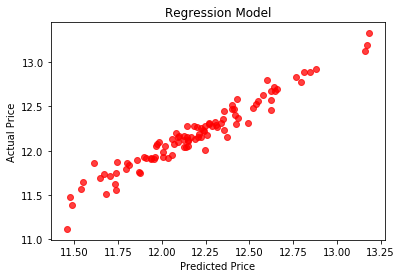

In [62]:
# Plotting the Predicted values and actual values to see how close they are
plt.scatter(pred, y_test, alpha=.75, color='red') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Regression Model')